<a href="https://colab.research.google.com/github/brunasil98/Colab_Semiconductor/blob/main/Presentation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
####################################################
import os
import cv2
from PIL import Image
import numpy as np


In [ ]:
import tensorflow.keras.utils as conv_utils

In [ ]:
image_directory = r'drive/MyDrive/Youtube_Neural_Network/'
SIZE = 128
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

Error = os.listdir(image_directory + 'Error/')
for i, image_name in enumerate(Error):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Error/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
Non_error = os.listdir(image_directory + 'Non_error/')
for i, image_name in enumerate(Non_error):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Non_error/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)


In [ ]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


In [ ]:

X_train = conv_utils.normalize(X_train)
X_test = conv_utils.normalize(X_test)


In [ ]:
print(X_train.shape )

(285, 128, 128, 3)


In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(1))
model.add(Activation('sigmoid')) 
model.add(BatchNormalization()) 

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['acc'])

print(model.summary())    
###############################################################  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)       

In [ ]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 300,      
                         validation_split = 0.1,
                         shuffle = False
                     )


model.save('semiconductor_model1_300epochs.h5')  


Epoch 1/300
4/4 [==============================] - 6s 1s/step - loss: 6.1653 - acc: 0.4609 - val_loss: 3.0728 - val_acc: 0.5517
Epoch 2/300
4/4 [==============================] - 5s 1s/step - loss: 5.4083 - acc: 0.5078 - val_loss: 0.8002 - val_acc: 0.5862
Epoch 3/300
4/4 [==============================] - 5s 1s/step - loss: 5.5830 - acc: 0.5273 - val_loss: 0.7366 - val_acc: 0.3793
Epoch 4/300
4/4 [==============================] - 5s 1s/step - loss: 5.2805 - acc: 0.5391 - val_loss: 0.7496 - val_acc: 0.4483
Epoch 5/300
4/4 [==============================] - 5s 1s/step - loss: 4.7512 - acc: 0.5664 - val_loss: 0.7093 - val_acc: 0.5172
Epoch 6/300
4/4 [==============================] - 5s 1s/step - loss: 5.0751 - acc: 0.5664 - val_loss: 0.8326 - val_acc: 0.4483
Epoch 7/300
4/4 [==============================] - 5s 1s/step - loss: 4.9244 - acc: 0.5586 - val_loss: 0.7831 - val_acc: 0.4483
Epoch 8/300
4/4 [==============================] - 5s 1s/step - loss: 4.5578 - acc: 0.5781 - val_loss: 0

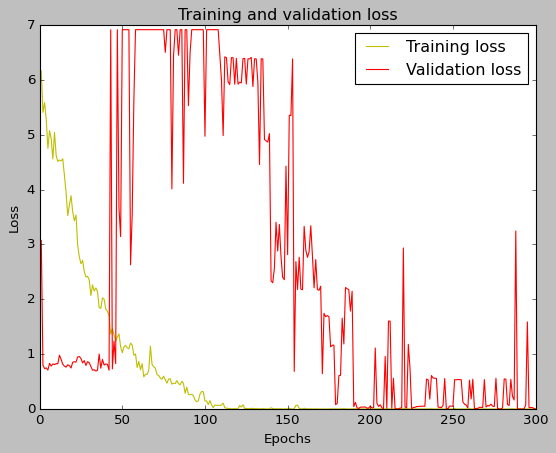

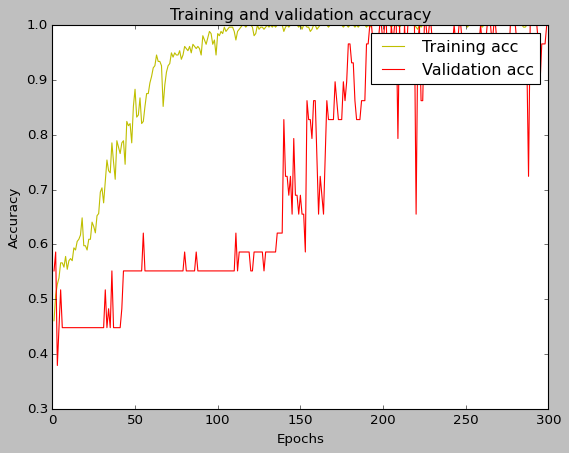

In [ ]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

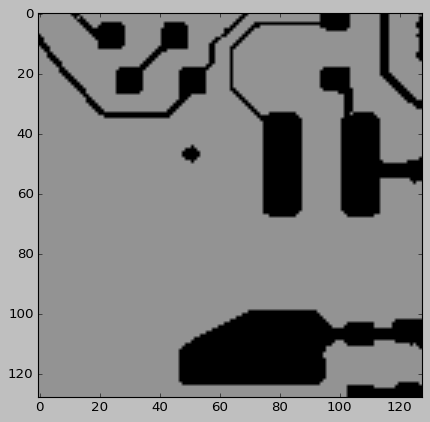

In [ ]:
n=23  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)


In [ ]:
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

The prediction for this image is:  [[-0.14571318]]
The actual label for this image is:  0


In [ ]:
from keras.models import load_model
# # load model
model = load_model('semiconductor_model_300epochs.h5')



In [ ]:

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

3/3 [==============================] - 1s 102ms/step - loss: 8.5694 - acc: 0.4444
Accuracy =  44.44444477558136 %


In [ ]:
mythreshold=0.908
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[32  0]
 [16 24]]


In [ ]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


In [ ]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

In [ ]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)